In [102]:
#Importing Standard Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
import matplotlib.gridspec as gridspec

%matplotlib inline 
sns.set(style= "ticks")

import warnings
warnings.filterwarnings("ignore")

from scipy.stats import zscore

## Scikit-learn features various classification, regression and clustering algorithms

from sklearn.model_selection import train_test_split   #importing library for splitting the data
from sklearn.linear_model import LogisticRegression #Importing Model

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import roc_curve,auc


# Algo

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB

from mlxtend.classifier import StackingClassifier

from sklearn.model_selection import cross_val_score, train_test_split

from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions



In [103]:
#load te data
Data = pd.read_csv("Data - Parkinsons")
Data.head(10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [91]:
#Name the variables of DataSet
Data.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [92]:
#Shape of dataset
Data.shape

(195, 24)

In [93]:
#Data Type of each attribute
Data.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [94]:
# If columns have null data in the file
Data.apply(lambda x : sum(x.isnull()))

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [95]:
#5 point summary of numerical attributes
Data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [96]:
#check skewness
Data.skew(axis = 0, skipna = True) 

MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        2.542146
MDVP:Flo(Hz)        1.217350
MDVP:Jitter(%)      3.084946
MDVP:Jitter(Abs)    2.649071
MDVP:RAP            3.360708
MDVP:PPQ            3.073892
Jitter:DDP          3.362058
MDVP:Shimmer        1.666480
MDVP:Shimmer(dB)    1.999389
Shimmer:APQ3        1.580576
Shimmer:APQ5        1.798697
MDVP:APQ            2.618047
Shimmer:DDA         1.580618
NHR                 4.220709
HNR                -0.514317
status             -1.187727
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491
dtype: float64

In [50]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

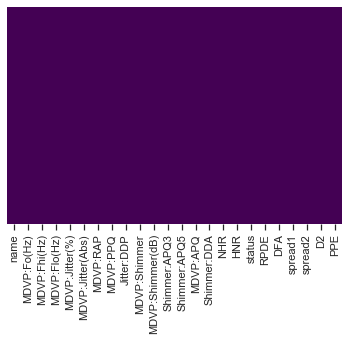

In [69]:
sns.heatmap(Data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

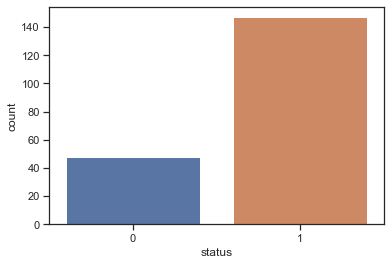

In [51]:
#checking the spread of Target Column
sns.countplot(x=Data['status'])

Text(0.5, 1.0, 'MDVP:Fo(Hz) spread over status')

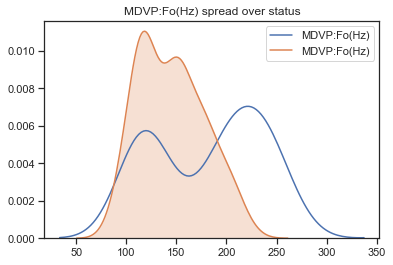

In [54]:
#from the above observations lets check the spread of Target coloumn with correlated features.
#1.spread over CCAvg 
sns.kdeplot(Data[Data['status'] == 0]['MDVP:Fo(Hz)'], shade=False)
sns.kdeplot(Data[Data['status'] == 1]['MDVP:Fo(Hz)'], shade=True)
plot.title("MDVP:Fo(Hz) spread over status")

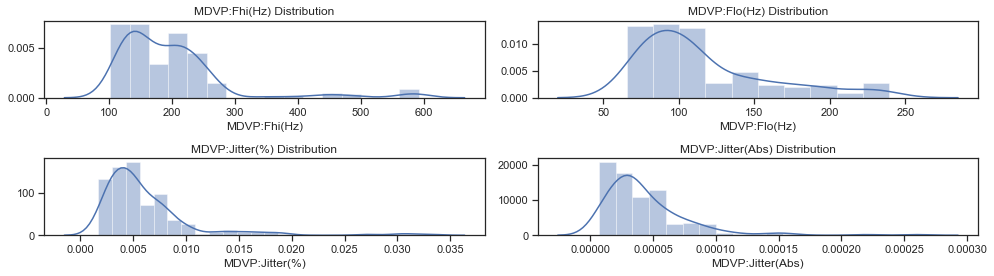

In [106]:

#The distplot shows the distribution of a univariate set of observations.
fig, axes = plot.subplots(2, 2, figsize=(14, 4))
sns.distplot(Data['MDVP:Fhi(Hz)'],ax=axes[0,0])
sns.distplot(Data['MDVP:Flo(Hz)'],ax=axes[0,1])
sns.distplot(Data['MDVP:Jitter(%)'],ax=axes[1,0])
sns.distplot(Data['MDVP:Jitter(Abs)'],ax=axes[1,1])
axes[0,0].set_title('MDVP:Fhi(Hz) Distribution')
axes[0,1].set_title('MDVP:Flo(Hz) Distribution')
axes[1,0].set_title('MDVP:Jitter(%) Distribution')
axes[1,1].set_title('MDVP:Jitter(Abs) Distribution')
plot.tight_layout()


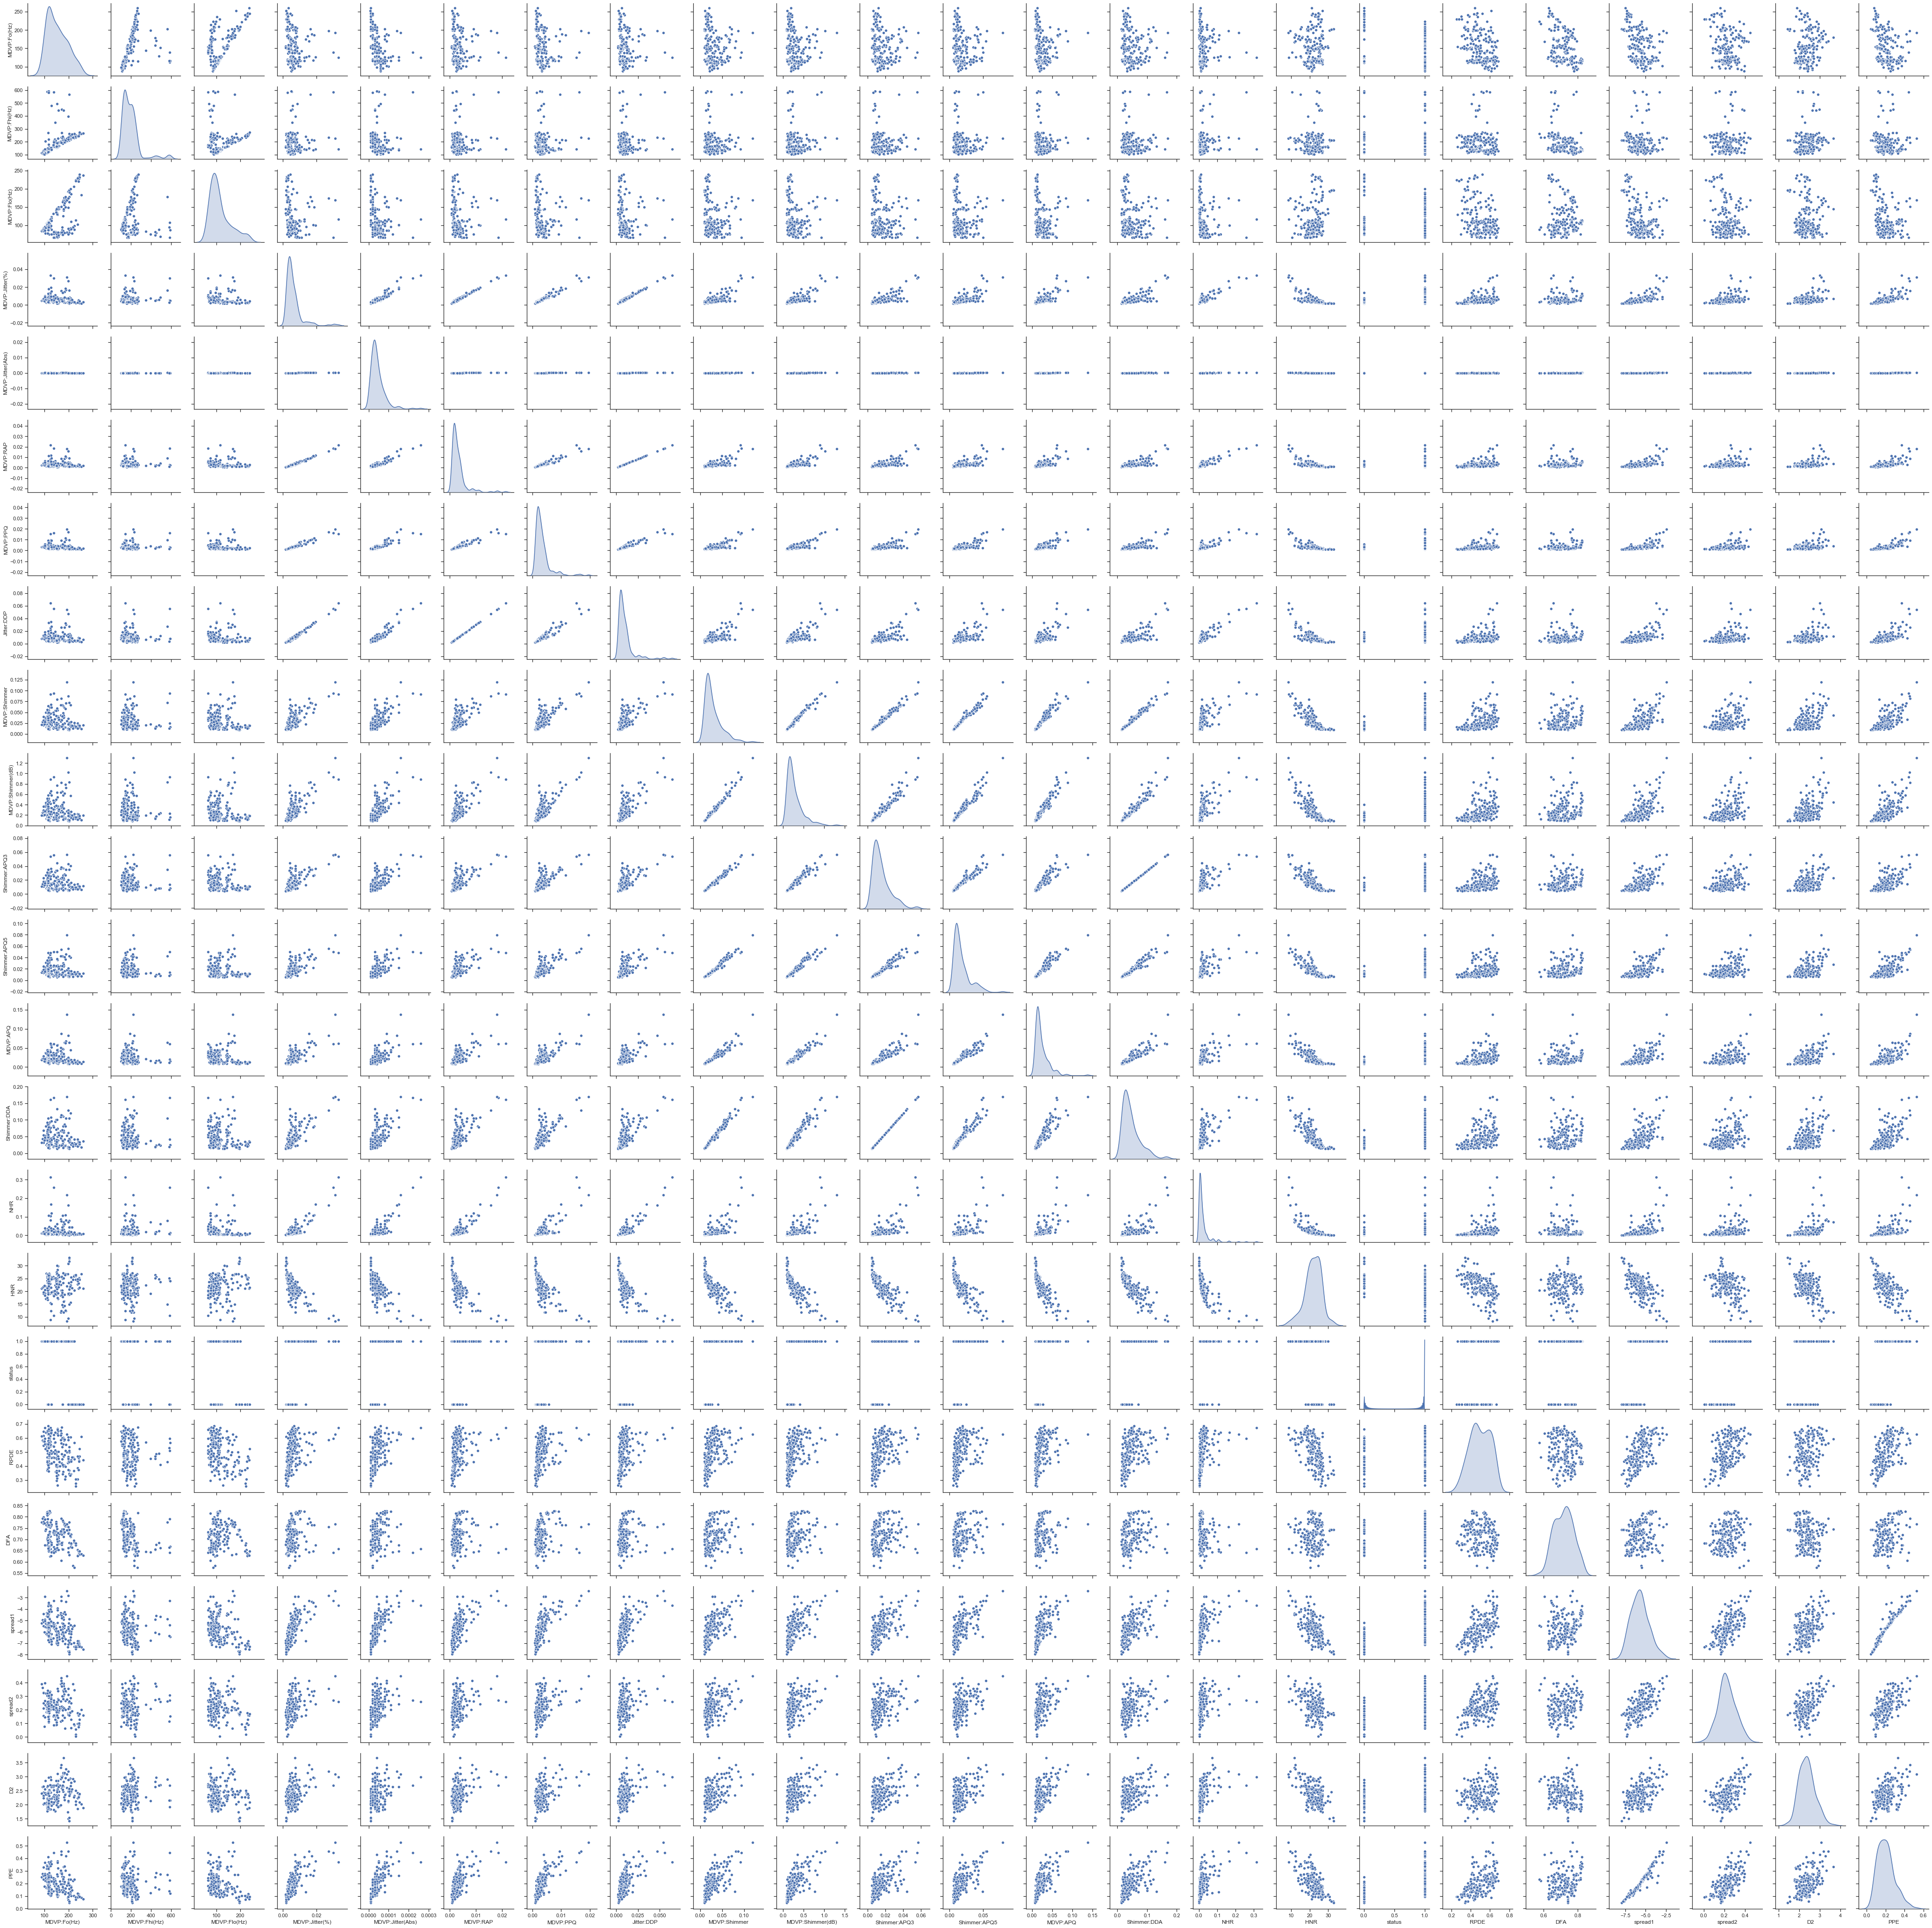

In [107]:
#pair plot to check the distribution and correlation of all variables
sns.pairplot(Data.iloc[:,1:],diag_kind='kde')

Observation

from the plot the observation is RPDE , DFA Spred1, spred 2, D2,PPE is almost normally distributed 
 skewness is : 
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491

that means very slightly left skewed.



In [66]:
# Calculating Correlation
cor=Data.corr()
cor

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


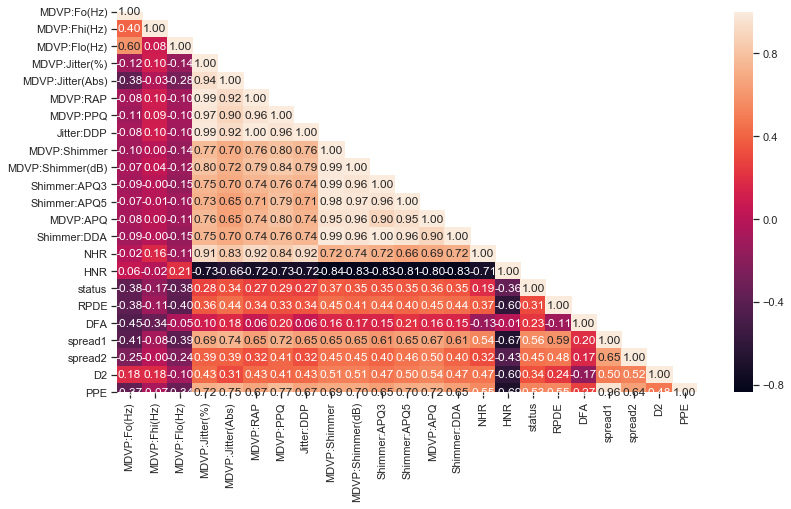

In [67]:
#Correlation with heat map

corr = Data.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plot.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')

Observation :
    
    We can see HNR and NHR are highlt correlated.

Get the features and labels from the DataFrame (dataset).
The features are all the columns except ‘status’, and the labels are those in the ‘status’ column.

In [13]:
# Get the features and labels

features=Data.loc[:,Data.columns!='status'].values[:,1:]
labels=Data.loc[:,'status'].values


In [14]:
#Get the count of each label (0 and 1) in labels
print(labels[labels==1].shape[0], labels[labels==0].shape[0])

147 48


SPLIT DATA

In [16]:
# Split the dataset into training and test data in the ratio of 70:30
x = features  # select all the independant variables
y = labels  # select the target variable

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.3, random_state=5)

In [17]:
# shape of training and testing data
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((136, 22), (59, 22), (136,), (59,))

Train at least 3 standard classification algorithms - Logistic Regression,
Naive Bayes’, SVM, k-NN etc, and note down their accuracies on the test
data.

SCALING :-
Feature Scaling is a technique to standardize the independent features present in the data in a fixed range.
It is performed during the data pre-processing to handle highly varying magnitudes or values or units.

In [22]:
# from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
X_train = sc_x.fit_transform(x_train)
X_test = sc_x.transform(x_test)


Standard classification (Logistic, KNN, SVM)

LOGISTIC REGRESSION

In [97]:
# fit the model on train
Logistic_model = LogisticRegression()
Logistic_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [98]:
#predict the model on test 
y_predict = Logistic_model.predict(X_test)

print(classification_report(y_test,y_predict))

print(accuracy_score(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.80      0.50      0.62        16
           1       0.84      0.95      0.89        43

    accuracy                           0.83        59
   macro avg       0.82      0.73      0.75        59
weighted avg       0.83      0.83      0.82        59

0.8305084745762712


In [99]:
# Print the Confusion Matrics of LOGISTIC REGRESSION
print(confusion_matrix(y_test,y_predict))

[[ 8  8]
 [ 2 41]]


KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

# instantiate learning model (k = 1)
knn = KNeighborsClassifier(n_neighbors = 1)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y1_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y1_pred))

# instantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors=5)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y2_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y2_pred))

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y3_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y3_pred))
# instantiate learning model (3 = 7)
knn = KNeighborsClassifier(n_neighbors=7)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y4_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y4_pred))

0.9830508474576272
0.9152542372881356
0.9322033898305084
0.8983050847457628


In [27]:
# Print the Confusion Matrics of KNN
print(confusion_matrix(y_test,y1_pred))

[[15  1]
 [ 0 43]]


SVM MODEL

In [28]:
# Fitting into SVM Model

from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [29]:
#predict the model on test 
y5_predict = svm_model.predict(X_test)

print(classification_report(y_test,y5_predict))

print(accuracy_score(y_test,y5_predict))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67        16
           1       0.84      1.00      0.91        43

    accuracy                           0.86        59
   macro avg       0.92      0.75      0.79        59
weighted avg       0.89      0.86      0.85        59

0.864406779661017


In [30]:
# Print the Confusion Matrics of SVM Model
print(confusion_matrix(y_test,y5_predict))

[[ 8  8]
 [ 0 43]]


Train a meta-classifier and note the accuracy on test data.

In [ ]:

clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], 
                          meta_classifier=lr)


In [78]:
print ('3- fold cross validation:\n')
for clf, label in zip([clf1,clf2,clf3,sclf],
                    ['KNN',
                    'Random Forest',
                    'Naive Bayes',
                    'StackingClassifier']
                    ):
    
    scores = model_selection.cross_val_score(clf,X_test,y_test,cv=3,scoring = 'f1_macro')
    
    print("F1 Scores : %0.2f (+/- % 0.2f) [%s]"
         % (scores.mean(),scores.std(), label))

3- fold cross validation:

F1 Scores : 0.76 (+/-  0.02) [KNN]
F1 Scores : 0.78 (+/-  0.07) [Random Forest]
F1 Scores : 0.74 (+/-  0.06) [Naive Bayes]
F1 Scores : 0.78 (+/-  0.04) [StackingClassifier]


Train at least one standard Ensemble model - Random forest, Bagging,
Boosting etc, and note the accuracy

 Standard Ensemble model -- Random Forest

In [34]:
# Fitting into Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

randomForest_model = RandomForestClassifier(n_estimators = 16, criterion = "entropy" ,random_state = 5)
randomForest_model.fit(X_train,y_train)
y6_predict = randomForest_model.predict(X_test)

print(classification_report(y_test,y6_predict))

print(accuracy_score(y_test,y6_predict))

              precision    recall  f1-score   support

           0       0.79      0.69      0.73        16
           1       0.89      0.93      0.91        43

    accuracy                           0.86        59
   macro avg       0.84      0.81      0.82        59
weighted avg       0.86      0.86      0.86        59

0.864406779661017


In [79]:
# Print the Confusion Matrics of Random Forest Classifier
print(confusion_matrix(y_test,y6_predict))

[[11  5]
 [ 3 40]]


BAGGING

In [80]:
# Fitting into Bagging Classifier
from sklearn.ensemble import BaggingClassifier

bgcl =  BaggingClassifier(n_estimators = 16 ,random_state = 5)
bgcl.fit(X_train,y_train)
y7_predict = bgcl.predict(X_test)
print(classification_report(y_test,y7_predict))

print(accuracy_score(y_test,y7_predict))

              precision    recall  f1-score   support

           0       0.83      0.62      0.71        16
           1       0.87      0.95      0.91        43

    accuracy                           0.86        59
   macro avg       0.85      0.79      0.81        59
weighted avg       0.86      0.86      0.86        59

0.864406779661017


In [81]:
# Print the Confusion Matrics of BaggingClassifier
print(confusion_matrix(y_test,y7_predict))

[[10  6]
 [ 2 41]]


In [86]:
#Model comparison
x = features  # select all the independant variables
y = labels  # select the target variable
models = []
models.append(('LR', LogisticRegression()))
models.append(('SVM', SVC()))
models.append(('KNN', KNeighborsClassifier()))


# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=101)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.845055 (0.097357)
SVM: 0.883516 (0.091374)
KNN: 0.891758 (0.080417)


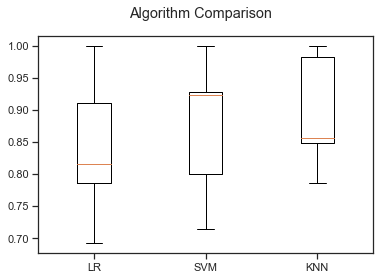

In [104]:
# boxplot algorithm comparison
fig = plot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plot.boxplot(results)
ax.set_xticklabels(names)
plot.show()

Conclusion
After compairing Logistic,KNN,SVM algo we can conclude that Logistic Regression is Best among three.

KNN is a Discriminative Classifer, it try to model class boundary and membership directly, e.g. in a simple 2-feature dimension case this could mean trying to finding the line that best separates the classes, so if we see the distribution of 'STATUS' over other features we can see clearly that this data falls under Discrimative Classifer Problem

THE END